# Importing Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load the data set

In [2]:
df=pd.read_csv("C:/Users/kishore/Desktop/iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


# Replace Species type with numbers

In [34]:
df.variety.replace(['Setosa', 'Versicolor', 'Virginica'], [1, 2, 3], inplace=True)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


# Data preprocessing.. check the dataset size,shape,null values

In [35]:
df.size

750

In [36]:
df.shape

(150, 5)

In [37]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width,variety
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,2.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [38]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [39]:
df.isna()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [40]:
df.isnull()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


# Creating a pairplot to visualize the similarities and especially difference between the species

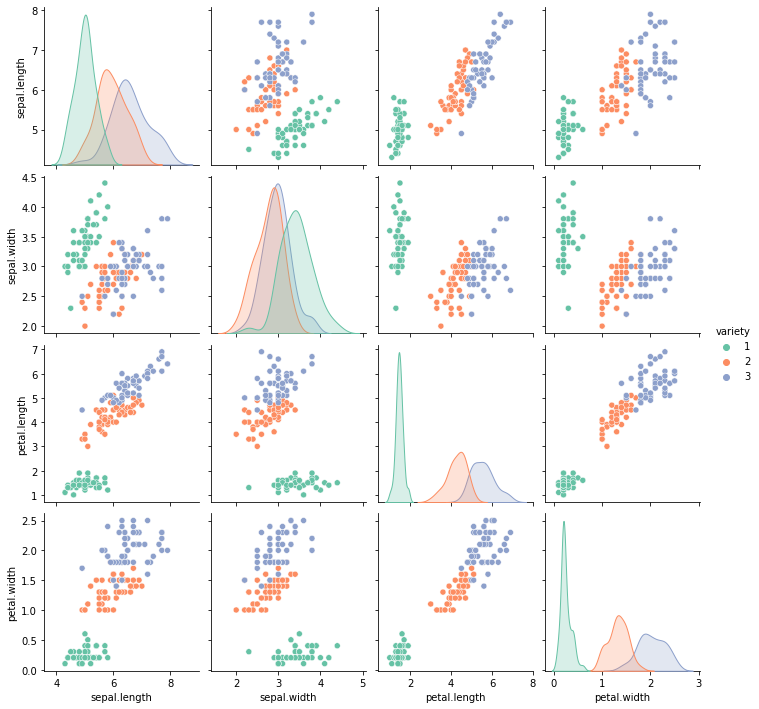

In [41]:
sns.pairplot(data=df, hue='variety', palette='Set2')

# split the training testing data

In [42]:
from sklearn.model_selection import train_test_split

# Separating the independent variables from dependent variables# 

In [43]:
X=df.iloc[:,:-1]
y=df.iloc[:,4]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.24,random_state=0)

# Print Shape of the train and test data

In [44]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(114, 4) (36, 4) (114,) (36,)


# Coverting all training & testing values into range(-1 to 1)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#print(X_trainscale)
#print(X_testscale)

# training and fitting the model

In [55]:
from sklearn.svm import SVC
model=SVC()

# Fit the training data into model

In [56]:
model.fit(X_train,y_train)

SVC()

# prediction from training model

In [47]:
y_pred=model.predict(X_test)
y_pred

array([3, 2, 1, 3, 1, 3, 1, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 3, 2,
       1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 1, 3, 3, 2], dtype=int64)

# Training Accuracy score

In [48]:
print("Training accuracy:", model.score(X_train,y_train))

Training accuracy: 0.9649122807017544


# Testing accuracy score

In [49]:
from sklearn.metrics import accuracy_score
print("Testing accuracy:",accuracy_score(y_test,y_pred))

Testing accuracy: 1.0


# print the training and testing accuracy visually

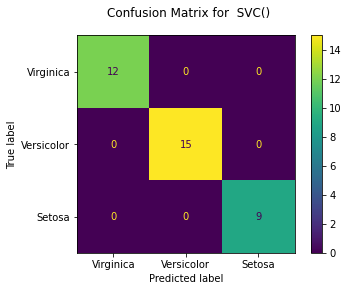

In [58]:
from sklearn.metrics import plot_confusion_matrix
classifiers=[ SVC()]
for model in classifiers:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fig=plot_confusion_matrix(model, X_test, y_test, display_labels=["Virginica","Versicolor","Setosa"])
    fig.figure_.suptitle("Confusion Matrix for  " + str(model))
    plt.show()

# Model evalution
# Importing the classification report and confusion matrix

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
print(confusion_matrix(y_test,y_pred))

[[12  0  0]
 [ 0 15  0]
 [ 0  0  9]]


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



# Dynamically Testing..prediction code

In [62]:
n1 = float(input("Enter a sepal_length value : "))
n2 = float(input("Enter a sepal_width value : "))
n3 = float(input("Enter a petal_length value : "))
n4 = float(input("Enter a petal_width value : "))

test = scaler.transform([[n1,n2,n3,n4]])
y_out= model.predict(test)
print("Output is :",y_out)

Enter a sepal_length value : 24
Enter a sepal_width value : 25
Enter a petal_length value : 33
Enter a petal_width value : 28
Output is : [3]
